In [15]:
import rslaser.rscrystal
from rslaser.rscrystal.crystal import *
import rslaser.rspulse
from rslaser.rspulse.pulse import *

import matplotlib.pyplot as plt
#create crystal
c = Crystal(n0=1.75,n2=0.001,L_cryst=0.2)

#create laser pulse
sigrW=0.00043698412731784714
# lp = LaserPulse(length=0.1,wavelength=800e-9,nslice=11)
k=PKDict(
    length=0.1, 
    wavelength=800e-9, 
    nslice=11,
    energyChirp = 1,
    phE = 1,
)
lp = LaserPulse(k)

In [16]:
(lpsxvals,lpsyvals,svals) = lp.rmsvals()
plt.plot(svals,lpsyvals)
plt.show

NameError: name 'rmsWavefrontIntensity' is not defined

In [ ]:
(ivals,svals) = lp.intensity_vals()
plt.plot(svals,ivals)
plt.show

In [3]:
#propagate laser pulse through crystal
c.propagate(lp)

#propagate laser pulse through drift
d = cavity.Drift(length=0.5)
d.propagate(lp)


#propagate laser pulse through lens
lens = cavity.Lens(f=0.2)
lens.propagate(lp)

#propagate laser pulse through drift
d.propagate(lp)

#propagate laser pulse through crystal
c.propagate(lp)

Element RMS sizes:sx=0.00044396392902196886 sy=0.00044396396274193605
Element RMS sizes:sx=0.00044278278138543446 sy=0.0004427827683301799
Element RMS sizes:sx=0.0004417445449785339 sy=0.00044174458269465874
Element RMS sizes:sx=0.0004408493641121862 sy=0.0004408493665697712
Element RMS sizes:sx=0.00044009815742203373 sy=0.00044009817134482547
Element RMS sizes:sx=0.0004394917131479387 sy=0.0004394916974772741
Element RMS sizes:sx=0.00043903065843812214 sy=0.0004390306735280382
Element RMS sizes:sx=0.0004387155264696655 sy=0.0004387155412197721
Element RMS sizes:sx=0.00043854667633715756 sy=0.0004385466708352542
Element RMS sizes:sx=0.0004385242824470918 sy=0.00043852425868710204
Element RMS sizes:sx=0.0004386484268137235 sy=0.00043864843018407167
Element RMS sizes:sx=0.00046154459495019885 sy=0.00046154459901002966
Element RMS sizes:sx=0.000459156632439809 sy=0.000459156612391087
Element RMS sizes:sx=0.0004568943309685688 sy=0.0004568943236726577
Element RMS sizes:sx=0.000454762041528

<function matplotlib.pyplot.show(close=None, block=None)>

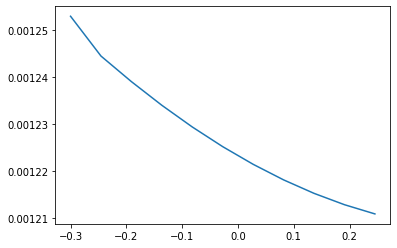

In [4]:
#Plot final laser pulse size distribution
(lpsxvals,lpsyvals,svals) = lp.rmsvals()
plt.plot(svals,lpsyvals)
plt.show

In [10]:
wfr0=lp._slice[3]._wfr
wfr0.unitElFld

1

Size of initial wavefront data array (coordinate): (216, 216)


/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


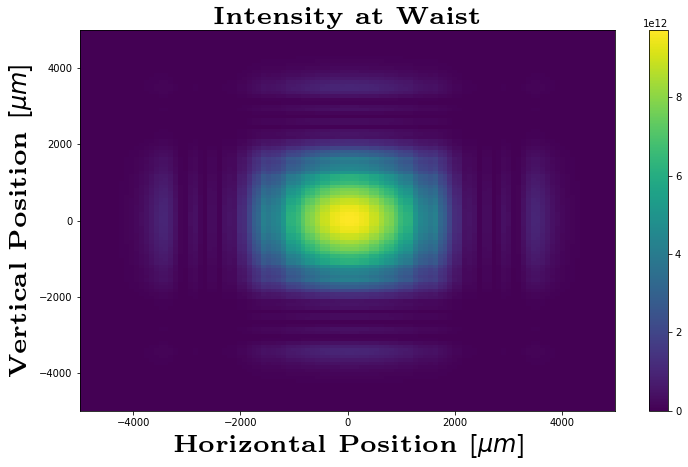

In [2]:
# Plot initial wavefront
##Initial wfr calculation
from array import array
from srwlib import srwl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}
wfrplot = lp._wfr[1] 

arIinit = array('f', [0]*wfrplot.mesh.nx*wfrplot.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot, 6, 0, 3, wfrplot.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D = np.array(arIinit).reshape((wfrplot.mesh.nx, wfrplot.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvalsf02=np.linspace(wfrplot.mesh.xStart,wfrplot.mesh.xFin,wfrplot.mesh.nx)
yvalsf02=np.linspace(wfrplot.mesh.yStart,wfrplot.mesh.yFin,wfrplot.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), arIinit2D, cmap=plt.cm.viridis)  ##By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.colorbar()
#['Horizontal Position [mm]', , 'Intensity']
xmax = 5e3
ymax = 5e3
ax.set_ylim(-ymax,ymax)
ax.set_xlim(-xmax,xmax)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity at Waist',**hfontLarge)
plt.show()

In [ ]:
f1=.5
optLens = srwlib.SRWLOptL(f1, f1)

In [ ]:
print(optLens)

In [ ]:
optLens.Fx

In [ ]:
optLens.Fx=.4

In [ ]:
print(optLens.Fx)

In [13]:
3.2**2

10.240000000000002